## Can Alzheimer be predicted?

### 1. Sourcing and Loading 


#### 1.1. Importing Libraries

In [1]:
# import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

from sklearn import tree, metrics
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
from matplotlib.legend_handler import HandlerLine2D

#### 1.2.  Loading the data
This MRI data sets has been taken from Open Access Series of Imaging Studies (OASIS)
which is a project aimed at making MRI data sets of the brain freely available to the
scientific community. OASIS is made available by the Washington University Alzheimer’s
Disease Research Center, Dr. Randy Buckner at the Howard Hughes Medical Institute (HHMI)
at Harvard University, the Neuroinformatics Research Group (NRG) at Washington University
School of Medicine,and the Biomedical Informatics Research Network (BIRN).

In [2]:
# First, make a variable called Cross-sec, and assign it to cross-sectional 
# collection of 416 subjects
Cross_sec = pd.read_csv('Data/oasis_cross-sectional.csv', index_col= None)
# Second, make a second variable called Long-sec, and assign it to longitudinal
#collection of 150 subjects
Long_sec = pd.read_csv('Data/oasis_longitudinal.csv', index_col= None)

Staging patients diagnosed with dementia is determined by a global rating scale, called clinical dementia rating scale (**CDR** ). The CDR evaluates cognitive, behavioral, and functional aspects of Alzheimer disease and other dementias. Features used for applying machine learning from these two sets of data include age, education, gender, socioeconomic status (**SES**), Mini-Mental State Exam (**MMSE**) which is a test of cognitive function, **eTIV** - estimated Total Intracranial Volume (sum of brain, ventricular, and extraventricular CSF) and brain volumes (**nWBV**), and Atlas Scaling Factor (**ASF**) which is volume-scaling factor required to match each individual to the atlas target.

### 2. Cleaning, transforming, and visualizing

## 2.1. Exploring the data


In [3]:
Cross_sec.head()

ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [4]:
Long_sec.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

## 2.2. Cleaning the data

In [5]:
Cross_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [6]:
Long_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


#### Check if data are all for right hand or left hand or both? 

In [7]:
Cross_sec['Hand'].unique()

array(['R'], dtype=object)

In [8]:
Long_sec['Hand'].unique()

array(['R'], dtype=object)

So all the data are from right hand poeple, thefore we do not need to keep this column

In [9]:
Cross_sec = Cross_sec.drop(['Hand'], axis = 1)

In [10]:
Long_sec = Long_sec.drop(['Hand'], axis = 1)

### Number of femal and male in the study

In [11]:
Long_sec['M/F'].value_counts()

F    213
M    160
Name: M/F, dtype: int64

In [12]:
Cross_sec['M/F'].value_counts()

F    268
M    168
Name: M/F, dtype: int64

#### Number of subjects scanned for Longitudinal and cross sectional 

In [13]:
Cross_sec['ID'].value_counts().sum()

436

In [14]:
Long_sec['Subject ID'].value_counts().sum()

373

#### Renaming the similar columns in both group to the same name 

In [15]:
Cross_sec.columns

Index(['ID', 'M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'Delay'],
      dtype='object')

In [16]:
Long_sec.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [17]:
Cross_sec = Cross_sec.rename(columns={'ID':'MRI ID'})

In [18]:
Long_sec = Long_sec.rename(columns={'EDUC':'Educ'})

#### Number of Null values for differnt features 

In [19]:
Cross_sec.isna().sum()

MRI ID      0
M/F         0
Age         0
Educ      201
SES       220
MMSE      201
CDR       201
eTIV        0
nWBV        0
ASF         0
Delay     416
dtype: int64

In [20]:
Long_sec.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
Educ           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In cross_sec group, I removed the delay as there are many null values for this features.    

In [21]:
Cross_sec = Cross_sec.drop(['Delay'], axis = 1)

In [22]:
Cross_sec[Cross_sec['Educ'].isna()]['MMSE'].isna().sum()

201

In [23]:
Cross_sec[Cross_sec['Educ'].isna()]['CDR'].isna().sum()

201

In [24]:
Cross_sec[Cross_sec['SES'].isna()]['CDR'].isna().sum()

201

In [25]:
Cross_sec[Cross_sec['SES'].isna()]['MMSE'].isna().sum()

201

In [26]:
Cross_sec[Cross_sec['SES'].isna()]['Educ'].isna().sum()

201

#### There are 201 observation that have NAN value for MMSE, Educ, CDR, SES. I drop those observations from the data

In [27]:
Cross_sec_cl = Cross_sec[Cross_sec['CDR'].notna()]
Cross_sec_cl = Cross_sec_cl.reset_index(drop=True)

Cross_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  235 non-null    object 
 1   M/F     235 non-null    object 
 2   Age     235 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     216 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    235 non-null    int64  
 8   nWBV    235 non-null    float64
 9   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.5+ KB


In [28]:
Cross_sec_cl.isna().sum()

MRI ID     0
M/F        0
Age        0
Educ       0
SES       19
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

In [29]:
#It is better to remove the null observation for MMSE, 
# MMSE is a mental test and important in evaluating dementia elevl and there are only two observations
#with Null value for MMSE.
Long_sec_cl = Long_sec
Long_sec_cl = Long_sec[Long_sec['MMSE'].notna()]
Long_sec_cl = Long_sec_cl.reset_index(drop=True)

Filling NAN value using IterativeImputer method

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
SES_np = Long_sec_cl['SES'].to_numpy() 
SES_np=SES_np.reshape(-1, 1) 
imp = IterativeImputer(max_iter=10, random_state=0)
Long_sec_cl['SES']= imp.fit_transform(SES_np)
Long_sec_cl.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
Educ          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [31]:
SES_np1 = Cross_sec_cl['SES'].to_numpy() 
SES_np1=SES_np1.reshape(-1, 1) 
imp1 = IterativeImputer(max_iter=10, random_state=0)
#imp.fit(SES_np)
Cross_sec_cl['SES']= imp.fit_transform(SES_np1)
Cross_sec_cl.isna().sum()

MRI ID    0
M/F       0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [32]:
Cross_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  235 non-null    object 
 1   M/F     235 non-null    object 
 2   Age     235 non-null    int64  
 3   Educ    235 non-null    float64
 4   SES     235 non-null    float64
 5   MMSE    235 non-null    float64
 6   CDR     235 non-null    float64
 7   eTIV    235 non-null    int64  
 8   nWBV    235 non-null    float64
 9   ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 18.5+ KB


In [33]:
Long_sec_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Age         371 non-null    int64  
 7   Educ        371 non-null    int64  
 8   SES         371 non-null    float64
 9   MMSE        371 non-null    float64
 10  CDR         371 non-null    float64
 11  eTIV        371 non-null    int64  
 12  nWBV        371 non-null    float64
 13  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 40.7+ KB


Some of these data obtained from the same subject (Same subject ID) during study.
I consider these repeated measurments as a new measurment. 

Therfore I removed few columns such as MR Delay, Group
, Visit, Subject ID from longitudinal data 

In [34]:
Long_sec_cl.drop(columns=['MR Delay', 'Group' , 'Visit', 'Subject ID'], inplace = True)

In [35]:
Cross_Long = pd.concat([Long_sec_cl,Cross_sec_cl])
Cross_Long = Cross_Long.rename(columns={'M/F':'gender'})

In [36]:
Cross_Long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  606 non-null    object 
 1   gender  606 non-null    object 
 2   Age     606 non-null    int64  
 3   Educ    606 non-null    float64
 4   SES     606 non-null    float64
 5   MMSE    606 non-null    float64
 6   CDR     606 non-null    float64
 7   eTIV    606 non-null    int64  
 8   nWBV    606 non-null    float64
 9   ASF     606 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 52.1+ KB


## 2.3 Exploratory Data Analysis (EDA)

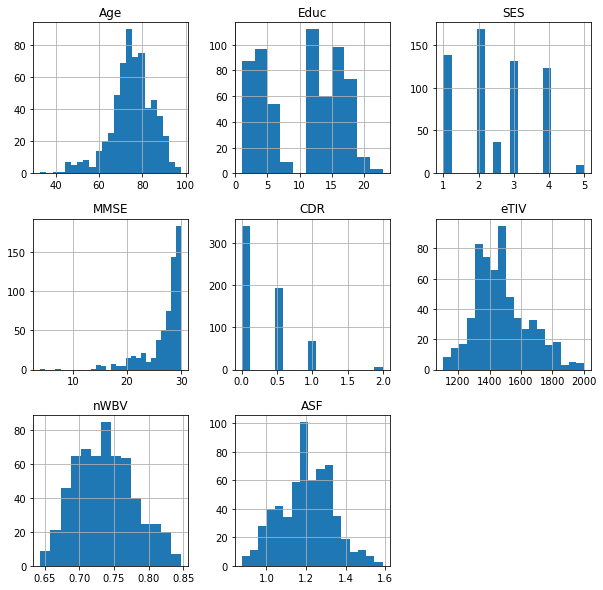

In [37]:
hist = Cross_Long.hist(bins='auto',figsize =(10,10))
plt.grid(False)

In [38]:
import seaborn as sns


## Gender

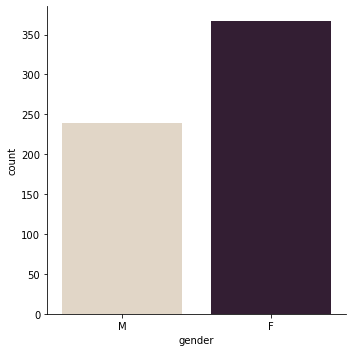

In [39]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=Cross_Long)


In [40]:
Cross_Long[Cross_Long['gender'] =='F'].count()


MRI ID    367
gender    367
Age       367
Educ      367
SES       367
MMSE      367
CDR       367
eTIV      367
nWBV      367
ASF       367
dtype: int64

In [41]:
Cross_Long[Cross_Long['gender'] =='M'].count()


MRI ID    239
gender    239
Age       239
Educ      239
SES       239
MMSE      239
CDR       239
eTIV      239
nWBV      239
ASF       239
dtype: int64

### Results: There are 20 % more female than male in the study. 

## Education 

In [42]:
plottepm = Cross_Long.copy(deep=True)

In [43]:
plottepm['Educ'] = pd.cut(plottepm.Educ, [1,5, 12, 16, 19,23], labels=['Elementry', 'High school', 'undergrad', 'grad', 'PhD'])

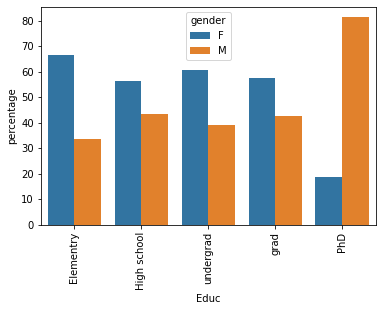

In [44]:
#sns.catplot(x="Educ", hue="gender", kind="count", data=plottepm)


education_counts = (plottepm.groupby(['Educ'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Educ'))
p = sns.barplot(x="Educ", y="percentage", hue="gender", data=education_counts)

_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels



### Results: The number of female in each education group below PhD is higher than male, however there are much more male with PhD degree.   

## Socioeconomic status(SES)

Socioeconomic status is an economic and sociological combined total measure of a person's work experience and of an individual's or family's economic access to resources and social position in relation to others. 


In [45]:
plottepm = Cross_Long.copy(deep=True)

In [46]:
plottepm['SES'] = pd.cut(plottepm.SES, [1,2, 3, 5], labels=['Poor', 'Meidum', 'Rich'])

<AxesSubplot:xlabel='SES', ylabel='percentage'>

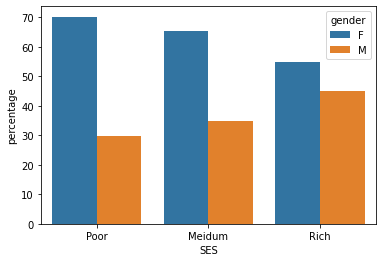

In [47]:

SES_counts = (plottepm.groupby(['SES'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('SES'))
SES_counts.head()

sns.barplot(x="SES",y='percentage', hue="gender", data=SES_counts)



### Results: There are more poor female than male in the study. 

## Dementia (CDR)

The CDR is based on a scale of 0–3: no dementia (CDR = 0), questionable dementia (CDR = 0.5), MCI (CDR = 1), moderate cognitive impairment (CDR = 2), and severe cognitive impairment (CDR = 3).
    There are 265 Demnetia in the whole sample. 

In [48]:
Cross_Long[Cross_Long['CDR'] >0].count()

MRI ID    265
gender    265
Age       265
Educ      265
SES       265
MMSE      265
CDR       265
eTIV      265
nWBV      265
ASF       265
dtype: int64

In [49]:
plottepm = Cross_Long.copy(deep=True)

In [50]:
plottepm['CDR'] = pd.cut(plottepm.CDR, [0,.5, 1, 2, 3],right= False, labels=[ 'No Dementia', 'qestionable Dementia', 'Mild cogntiive impairment', 'Severe cognitive impairment'])

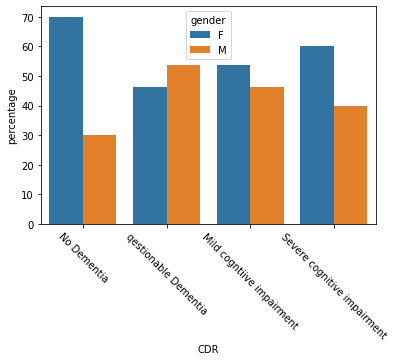

In [51]:

CDR_counts = (plottepm.groupby(['CDR'])['gender']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('CDR'))
plottepm.head()

p = sns.barplot(x="CDR", y="percentage", hue="gender", data=CDR_counts)
_ = plt.setp(p.get_xticklabels(), rotation=-45)  # Rotate labels




### Results: 40 % percent of subjects sufferers from Dementia


/var/folders/y8/lk45pzj50nzdb09fpk33sxg40000gn/T/ipykernel_10605/1299350166.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cross_Long_norm = Cross_Long_temp/Cross_Long_temp.mean()


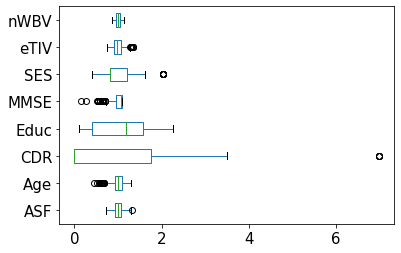

In [52]:
# outlier 

Cross_Long_temp = Cross_Long.copy(deep=True)
Cross_Long_norm = Cross_Long_temp/Cross_Long_temp.mean()
boxplot = Cross_Long_norm.boxplot(grid=False, vert=False,fontsize=15)

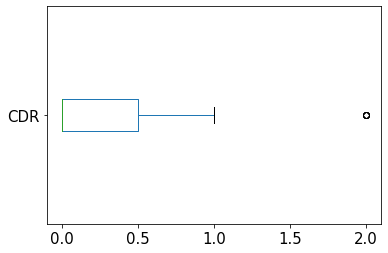

In [53]:
boxplot = Cross_Long.boxplot(column = 'CDR',grid=False, vert=False,fontsize=15)

In [54]:
Cross_Long[Cross_Long['CDR']>1.5].head()

MRI ID gender  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF
184  OAS2_0087_MR2      F   98  17.0  1.0  21.0  2.0  1503  0.660  1.168
251  OAS2_0120_MR2      F   78  14.0  3.0  15.0  2.0  1401  0.700  1.253
330  OAS2_0164_MR2      M   79  20.0  1.0  25.0  2.0  1710  0.760  1.026
159  OAS1_0308_MR1      F   78   3.0  3.0  15.0  2.0  1401  0.703  1.253
179  OAS1_0351_MR1      M   86   1.0  4.0  15.0  2.0  1512  0.665  1.161

### Comparing Dementia versus Ctrl subjects



In [55]:
Cross_Long[Cross_Long['CDR']==0].describe().T

count         mean         std       min       25%       50%       75%  \
Age   341.0    73.956012   11.445567    33.000    68.000    75.000    82.000   
Educ  341.0    10.521994    6.161332     1.000     4.000    12.000    16.000   
SES   341.0     2.334257    1.050746     1.000     2.000     2.000     3.000   
MMSE  341.0    29.173021    1.007022    25.000    29.000    29.000    30.000   
CDR   341.0     0.000000    0.000000     0.000     0.000     0.000     0.000   
eTIV  341.0  1468.914956  170.811993  1106.000  1346.000  1445.000  1561.000   
nWBV  341.0     0.751845    0.043233     0.644     0.720     0.750     0.783   
ASF   341.0     1.210393    0.136034     0.876     1.124     1.215     1.304   

           max  
Age     97.000  
Educ    23.000  
SES      5.000  
MMSE    30.000  
CDR      0.000  
eTIV  2004.000  
nWBV     0.847  
ASF      1.587

In [56]:
Cross_Long[Cross_Long['CDR']>0].describe().T

count         mean         std       min       25%          50%  \
Age   265.0    76.815094    7.100453    61.000    72.000    77.000000   
Educ  265.0     9.735849    5.926798     1.000     3.000    12.000000   
SES   265.0     2.649699    1.124519     1.000     2.000     2.490741   
MMSE  265.0    24.739623    4.331454     4.000    22.000    26.000000   
CDR   265.0     0.654717    0.286413     0.500     0.500     0.500000   
eTIV  265.0  1489.909434  168.493321  1143.000  1365.000  1476.000000   
nWBV  265.0     0.718192    0.033754     0.644     0.694     0.715000   
ASF   265.0     1.192555    0.131315     0.881     1.110     1.189000   

           75%       max  
Age     82.000    98.000  
Educ    15.000    20.000  
SES      4.000     5.000  
MMSE    28.000    30.000  
CDR      1.000     2.000  
eTIV  1581.000  1992.000  
nWBV     0.742     0.806  
ASF      1.286     1.535

In [57]:
plottepm = Cross_Long.copy(deep=True)
plottepm['Dementia'] = 1
plottepm = plottepm.reset_index(drop=True)
plottepm.loc[plottepm.CDR == 0, 'Dementia'] =0 

In [58]:
from scipy import stats

<AxesSubplot:xlabel='Dementia', ylabel='ASF'>

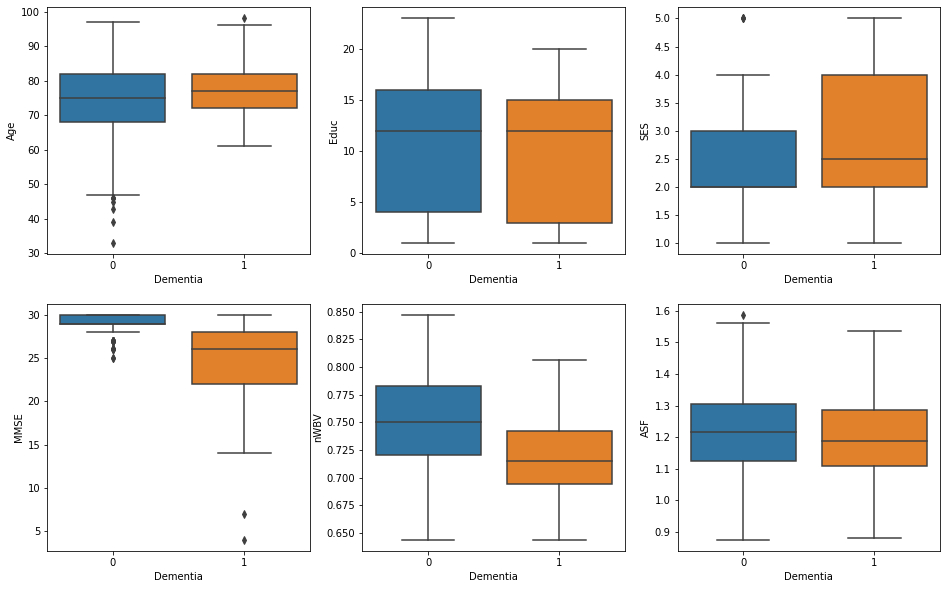

In [59]:
#plottepm = pd.DataFrame(plottepm)
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))


sns.boxplot(  x='Dementia', y='Age', data=plottepm,   ax=axes[0,0])
sns.boxplot(  x='Dementia', y='Educ', data=plottepm, ax=axes[0,1])
sns.boxplot(  x='Dementia', y='SES', data=plottepm, ax=axes[0,2])
sns.boxplot(  x='Dementia', y='MMSE', data=plottepm,  ax=axes[1,0])
sns.boxplot(  x='Dementia', y='nWBV', data=plottepm,  ax=axes[1,1])
sns.boxplot(  x='Dementia', y='ASF', data=plottepm, ax=axes[1,2])





In [60]:
stats.ttest_ind(plottepm[plottepm['Dementia'] ==0]['MMSE'], plottepm[plottepm['Dementia'] ==1]['MMSE']) 

Ttest_indResult(statistic=18.279746073543986, pvalue=9.575715300889582e-60)

In [61]:
stats.ttest_ind(plottepm[plottepm['Dementia'] ==0]['Age'], plottepm[plottepm['Dementia'] ==1]['Age']) 

Ttest_indResult(statistic=-3.567436534810806, pvalue=0.000389068143039792)

In [62]:
stats.ttest_ind(plottepm[plottepm['Dementia'] ==0]['SES'], plottepm[plottepm['Dementia'] ==1]['SES']) 

Ttest_indResult(statistic=-3.5547702162080745, pvalue=0.0004078915453463758)

In [63]:
stats.ttest_ind(plottepm[plottepm['Dementia'] ==0]['nWBV'], plottepm[plottepm['Dementia'] ==1]['nWBV']) 

Ttest_indResult(statistic=10.437378017272072, pvalue=1.467758321940503e-23)

### Comparing Dementia versus Ctrl subjects: Results


There is a significant difference between ctrl group and Dementia group in following features:
    MMSE,Age, SES, nWBV

| Features | Age | SES | MMSE | nWBV |
|---:|:-------------|:-----------|:------|:------|
|p-value|4.0e-4|4.0e-4|9.6e-59|1.5 e-23

 ### Correlation between features

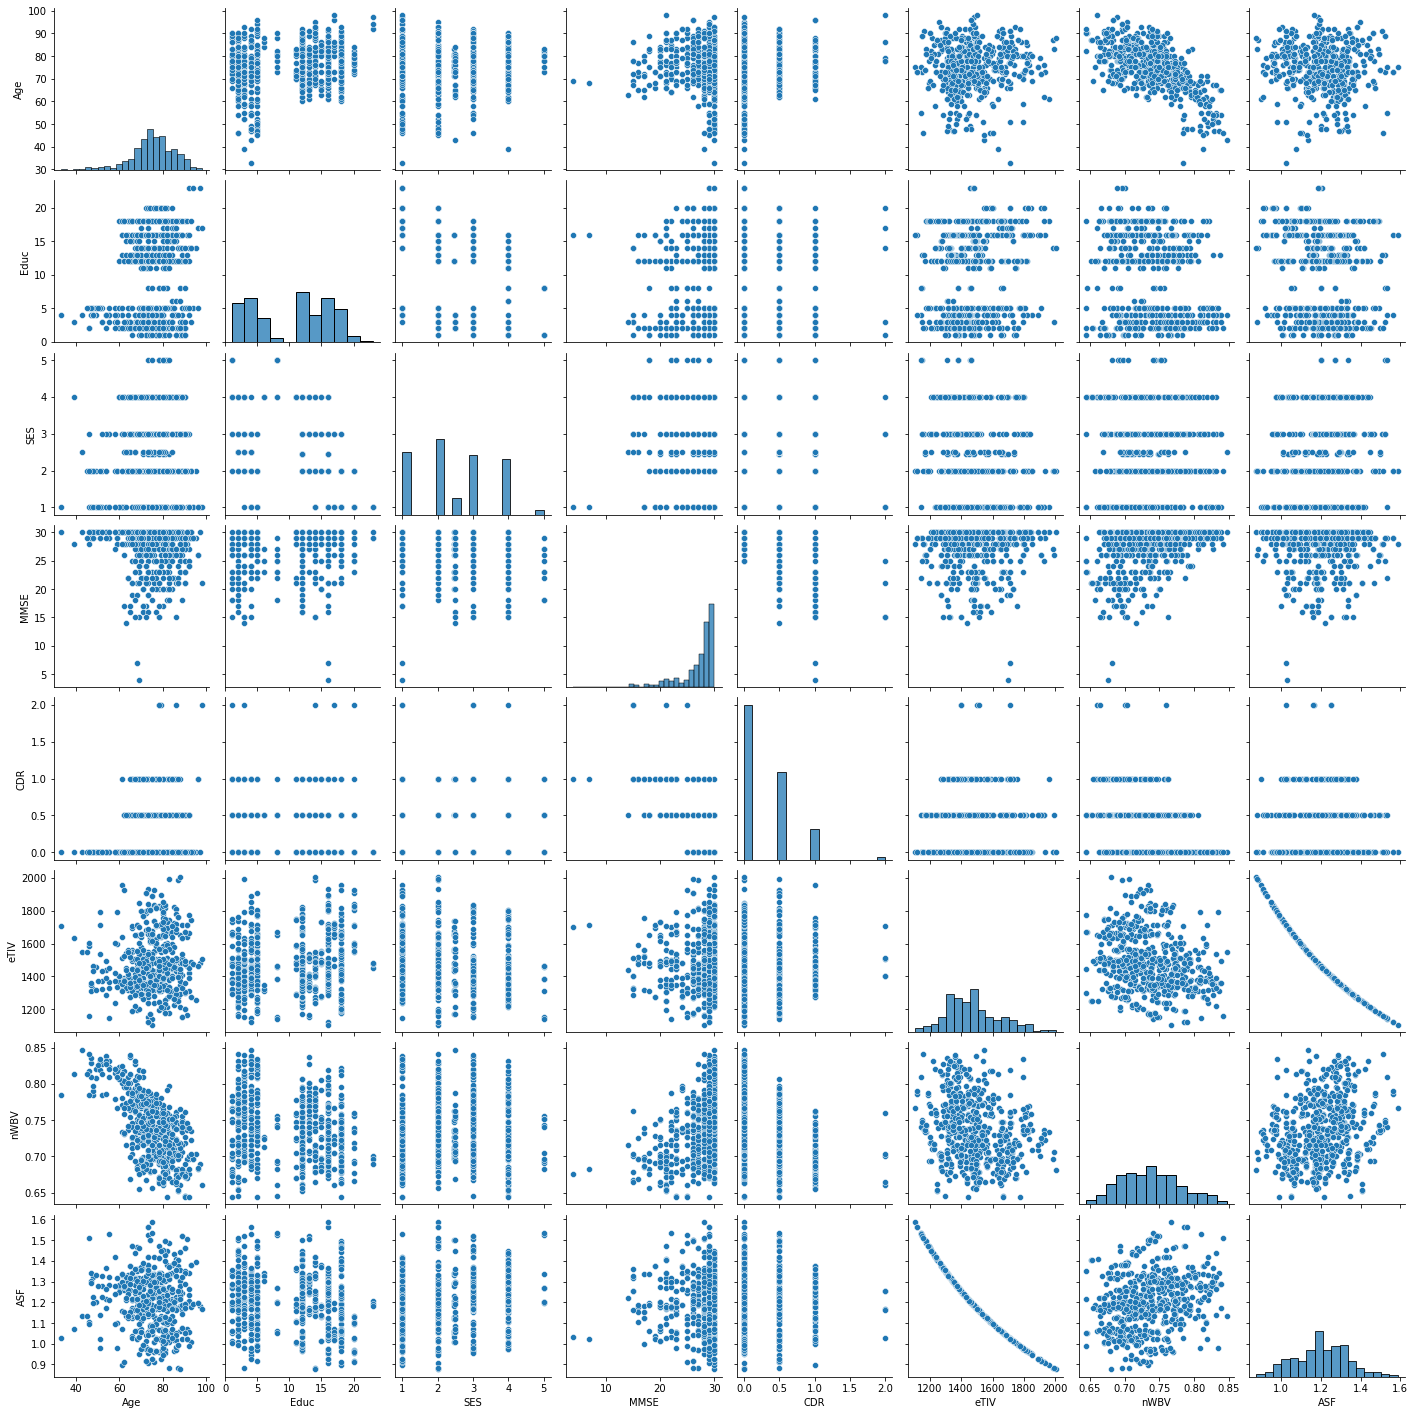

In [64]:
Cross_Long_3 = Cross_Long.copy(deep=True)

Cross_Long_3.reset_index(inplace=True, drop=True)

g = sns.pairplot(Cross_Long_3)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Educ'),
  Text(0, 2.5, 'SES'),
  Text(0, 3.5, 'MMSE'),
  Text(0, 4.5, 'CDR'),
  Text(0, 5.5, 'eTIV'),
  Text(0, 6.5, 'nWBV'),
  Text(0, 7.5, 'ASF')])

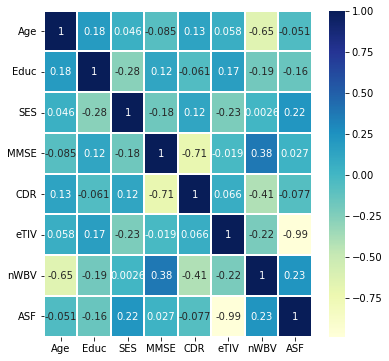

In [85]:
#create the correlation matrix heat map
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

In [86]:
Cross_Long_M = Cross_Long[Cross_Long['gender']=='M']
Cross_Long_F = Cross_Long[Cross_Long['gender']=='F']

Investigating the dependency of correlation to the gender 

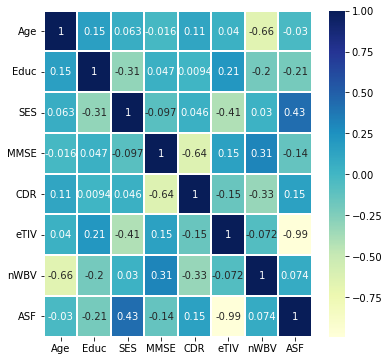

In [87]:
plt.figure(figsize=(6,6))
sns.heatmap(Cross_Long_M.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

Text(0.5, 1.0, 'Correlation for Female subjects')

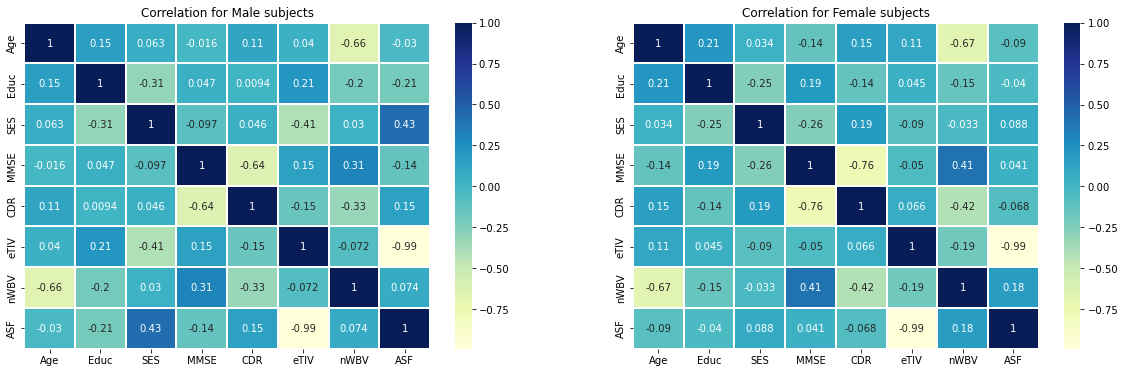

In [88]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,6))


#sns.boxplot(  x='Dementia', y='Age', data=plottepm,   ax=axes[0,0])
sns.heatmap(Cross_Long_M.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax1)
sns.heatmap(Cross_Long_F.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax2)
ax1.set_title('Correlation for Male subjects')
ax2.set_title('Correlation for Female subjects')

In [89]:
Cross_Long_Dem = Cross_Long[Cross_Long['CDR']>0]
Cross_Long_Ctrl = Cross_Long[Cross_Long['CDR']==0]

Text(0.5, 1.0, 'Correlation for Ctrl subjects')

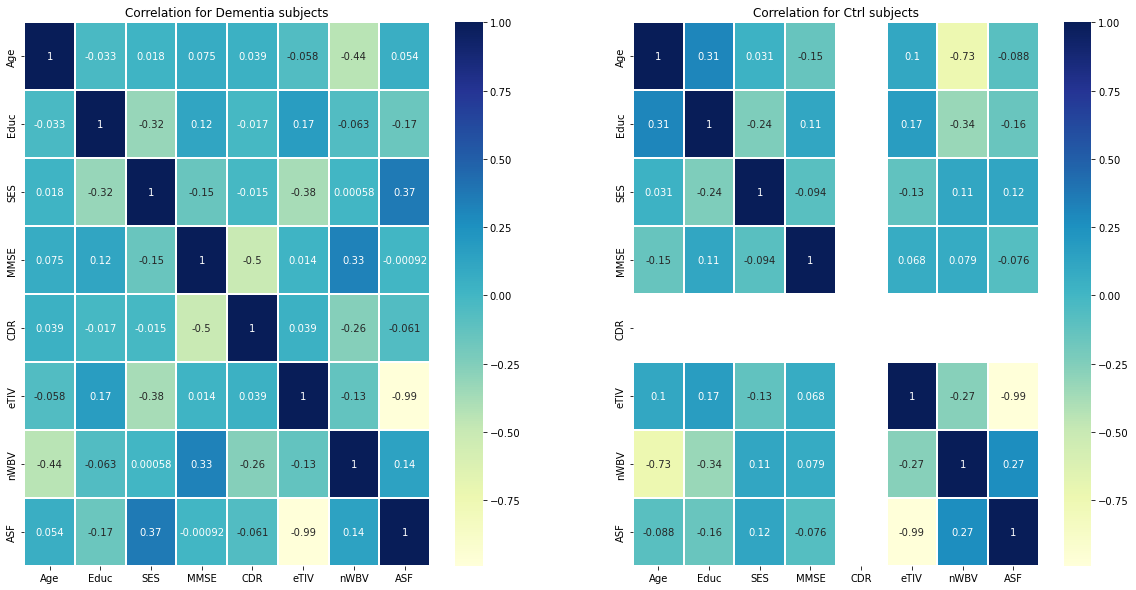

In [90]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))


#sns.boxplot(  x='Dementia', y='Age', data=plottepm,   ax=axes[0,0])
sns.heatmap(Cross_Long_Dem.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax1)
sns.heatmap(Cross_Long_Ctrl.corr(),linewidths=.1,cmap="YlGnBu", annot=True ,ax=ax2)
ax1.set_title('Correlation for Dementia subjects')
ax2.set_title('Correlation for Ctrl subjects')

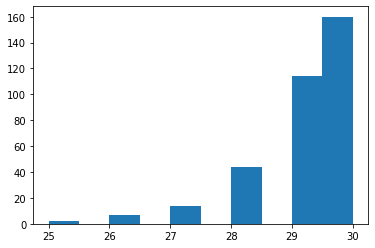

In [91]:
plt.hist(Cross_Long_Ctrl['MMSE'])
plt.show()

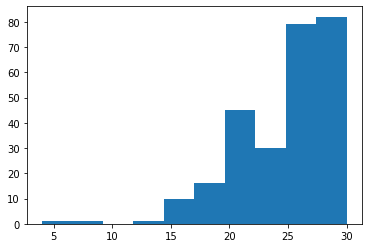

In [92]:
plt.hist(Cross_Long_Dem['MMSE'])
plt.show()

Distribution of MMSE is skewed to the right. 

### Correlation: results

- There is a very strong negative correlation between ASF&eTIV (corr =-99%)

- There is a significant negative correlation between nWBV&Age and MMSE&CDR (corr ~ -65%)

- Gender does not change the correlation

- Correlation between Age&nWBV was decreased from -73% to -44% in Dementia


# 3. Pre-processing and Training Data Development

### 3.1 create dummy features

In [132]:
Process_data = Cross_Long.copy(deep=True)
Process_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 606 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MRI ID  606 non-null    object 
 1   gender  606 non-null    object 
 2   Age     606 non-null    int64  
 3   Educ    606 non-null    float64
 4   SES     606 non-null    float64
 5   MMSE    606 non-null    float64
 6   CDR     606 non-null    float64
 7   eTIV    606 non-null    int64  
 8   nWBV    606 non-null    float64
 9   ASF     606 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 68.2+ KB


In [133]:
Process_data.drop(columns=['MRI ID'], inplace = True)

In [134]:

dfo=Process_data.select_dtypes(include=['object']) # select object type columns
Process_data = pd.concat([Process_data.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [135]:
Process_data.head()

Age  Educ       SES  MMSE  CDR  eTIV   nWBV    ASF  gender_F  gender_M
0   87  14.0  2.000000  27.0  0.0  1987  0.696  0.883         0         1
1   88  14.0  2.000000  30.0  0.0  2004  0.681  0.876         0         1
2   75  12.0  2.460452  23.0  0.5  1678  0.736  1.046         0         1
3   76  12.0  2.460452  28.0  0.5  1738  0.713  1.010         0         1
4   80  12.0  2.460452  22.0  0.5  1698  0.701  1.034         0         1

### 3.2 Standardize the magnitude of numeric features using a scaler

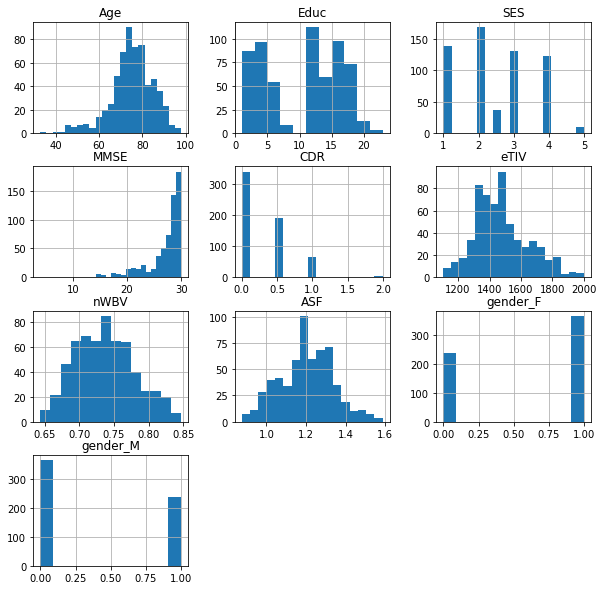

In [136]:
hist = Process_data.hist(bins='auto',figsize =(10,10))
plt.grid(False)

In [137]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
Process_data[['Age','Educ','SES','MMSE','CDR','eTIV','nWBV','ASF']] = scaler.fit_transform(Process_data[['Age','Educ','SES','MMSE','CDR','eTIV','nWBV','ASF']])

In [138]:
Process_data.head()

Age      Educ       SES      MMSE   CDR      eTIV      nWBV       ASF  \
0  0.830769  0.590909  0.250000  0.884615  0.00  0.981069  0.256158  0.009845   
1  0.846154  0.590909  0.250000  1.000000  0.00  1.000000  0.182266  0.000000   
2  0.646154  0.500000  0.365113  0.730769  0.25  0.636971  0.453202  0.239100   
3  0.661538  0.500000  0.365113  0.923077  0.25  0.703786  0.339901  0.188467   
4  0.723077  0.500000  0.365113  0.692308  0.25  0.659243  0.280788  0.222222   

   gender_F  gender_M  
0         0         1  
1         0         1  
2         0         1  
3         0         1  
4         0         1

In [100]:
Process_data_dementia = Process_data.copy(deep=True)
Process_data_dementia['Dementia'] = 1
Process_data_dementia = Process_data_dementia.reset_index(drop=True)
Process_data_dementia.loc[Process_data_dementia.CDR == 0, 'Dementia'] =0 
Process_data_dementia.drop(columns=['CDR'], inplace = True)
Process_data_dementia.head()

Age      Educ       SES      MMSE      eTIV      nWBV       ASF  \
0  0.830769  0.590909  0.250000  0.884615  0.981069  0.256158  0.009845   
1  0.846154  0.590909  0.250000  1.000000  1.000000  0.182266  0.000000   
2  0.646154  0.500000  0.365113  0.730769  0.636971  0.453202  0.239100   
3  0.661538  0.500000  0.365113  0.923077  0.703786  0.339901  0.188467   
4  0.723077  0.500000  0.365113  0.692308  0.659243  0.280788  0.222222   

   gender_F  gender_M  Dementia  
0         0         1         0  
1         0         1         0  
2         0         1         1  
3         0         1         1  
4         0         1         1

### 3.3 Creating train-test sets

from sklearn.model_selection import train_test_split

#### creating a data sets to predicit severity  of Dementia

y = Process_data.pop('CDR')
X = Process_data

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2, random_state=42)
X.iloc[X_train] # return dataframe train

In [102]:
# creating a data sets to predicit prsence of Dementia
y_dementia = Process_data_dementia.pop('Dementia')
X_dementia = Process_data_dementia

X_train,X_test,y_train,y_test = train_test_split(X_dementia.index,y,test_size=0.2, random_state=42)
X_dementia.iloc[X_train] # return dataframe train

Age      Educ       SES      MMSE      eTIV      nWBV       ASF  \
9    0.800000  0.500000  0.750000  1.000000  0.660356  0.300493  0.220816   
227  0.676923  0.772727  0.000000  0.807692  0.554566  0.674877  0.306610   
590  0.384615  0.136364  0.000000  0.884615  0.556793  0.665025  0.305204   
377  0.661538  0.045455  0.372685  0.923077  0.703786  0.369458  0.188467   
132  0.738462  0.772727  0.250000  1.000000  0.621381  0.162562  0.251758   
..        ...       ...       ...       ...       ...       ...       ...   
71   0.646154  0.545455  0.750000  0.961538  0.270601  0.660099  0.597750   
106  0.600000  0.500000  0.750000  0.500000  0.419822  0.251232  0.433193   
270  0.753846  0.772727  0.000000  0.961538  0.374165  0.000000  0.479606   
435  0.769231  0.090909  0.750000  0.769231  0.195991  0.753695  0.693390   
102  0.553846  0.681818  0.500000  1.000000  0.428731  0.738916  0.423347   

     gender_F  gender_M  
9           0         1  
227         0         1  
590         0         1  
377         0         1  
132         1         0  
..        ...       ...  
71          1         0  
106         0         1  
270         1         0  
435         1         0  
102         1         0  

[484 rows x 9 columns]

# 4. Modeling

## 4.1 Decision tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [105]:
tree_reg1 = DecisionTreeRegressor(max_depth=3, random_state=42)

If your training set is small, high bias/low variance classifiers (e.g., Naive Bayes) have an advantage over low bias/high variance classifiers (e.g., kNN), since the latter will overfit

In [106]:

X_train, X_test,y_train, y_test = train_test_split(X_dementia,y_dementia, test_size = 0.25, random_state = 246)


In [107]:
entr_model = DecisionTreeClassifier(criterion='entropy', random_state = 1234)
entr_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [108]:
y_pred = entr_model.predict(X_test)

In [109]:
y_pred = pd.Series(y_pred)

In [110]:
from io import StringIO  
dot_data = StringIO()

In [111]:
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

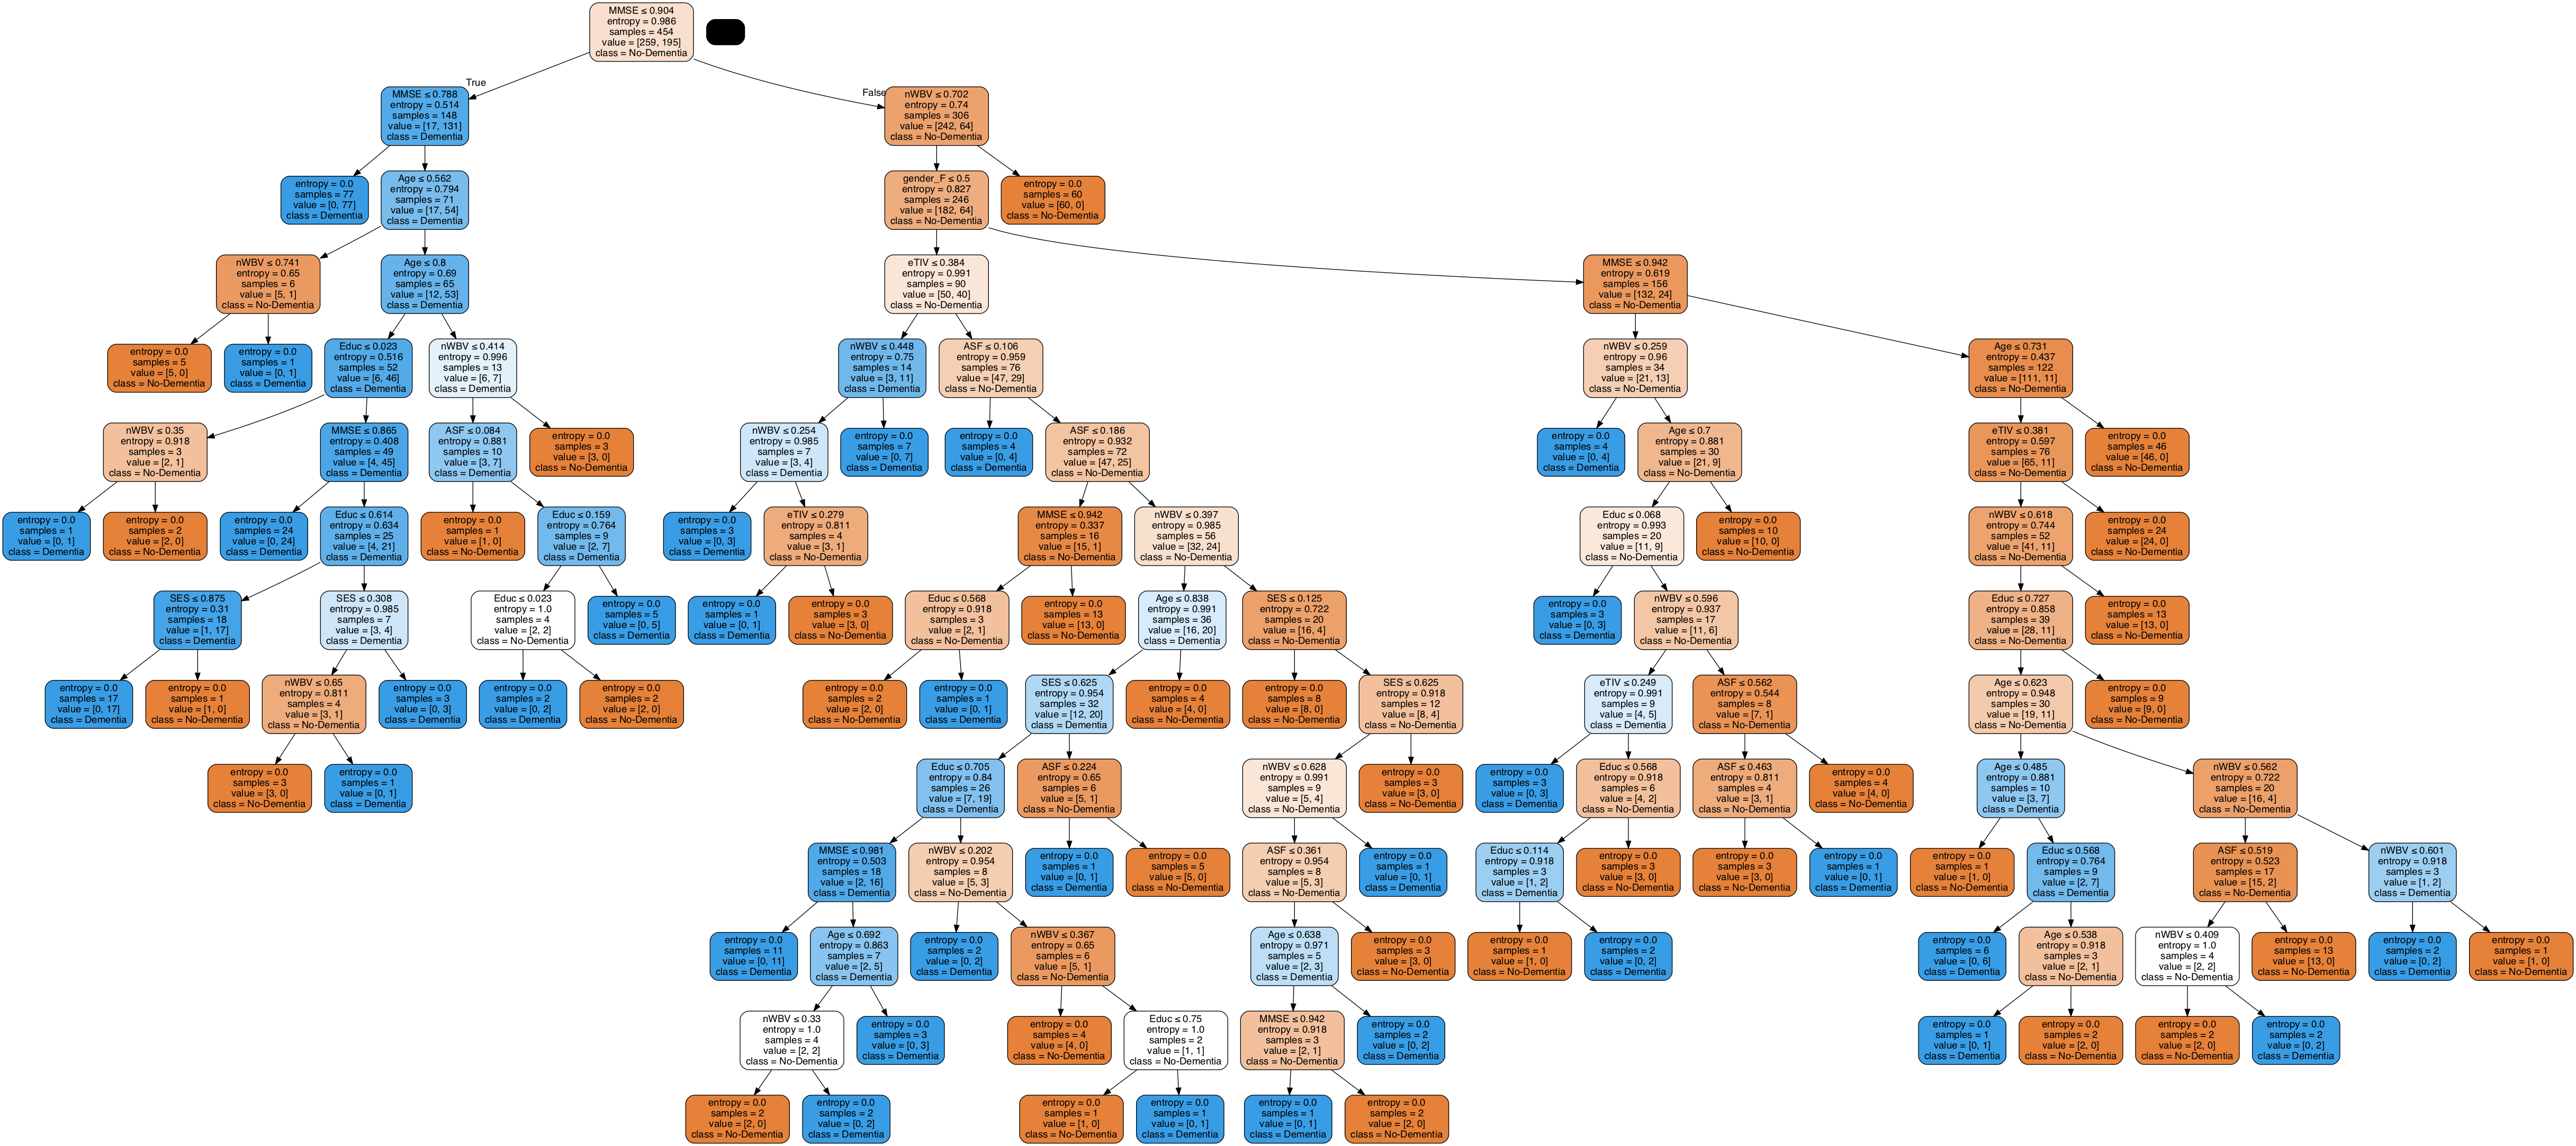

In [123]:
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["No-Dementia", "Dementia"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [119]:
## Model 1: Entropy model - no max_depth: Interpretation and evaluation
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Dementia"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No Dementia"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Dementia"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No Dementia"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8026315789473685
Balanced accuracy: 0.805574912891986
Precision score for "Dementia" 0.7564102564102564
Precision score for "No Dementia" 0.8513513513513513
Recall score for "Dementia" 0.8428571428571429
Recall score for "No Dementia" 0.7682926829268293


In [ ]:
Accuracy :
80.2% of sample were correctly predicted.
Precision: 80.5% of predcited Dementia  and 85.1 of predcited no-dementia were correct.
Recall : 84.2% of Dementia were predcited,while only 76.8 % of No-Dementia were predicted.

### Model 2: Entropy model - no max_depth: Interpretation and evaluation

In [121]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)


# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred) 

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

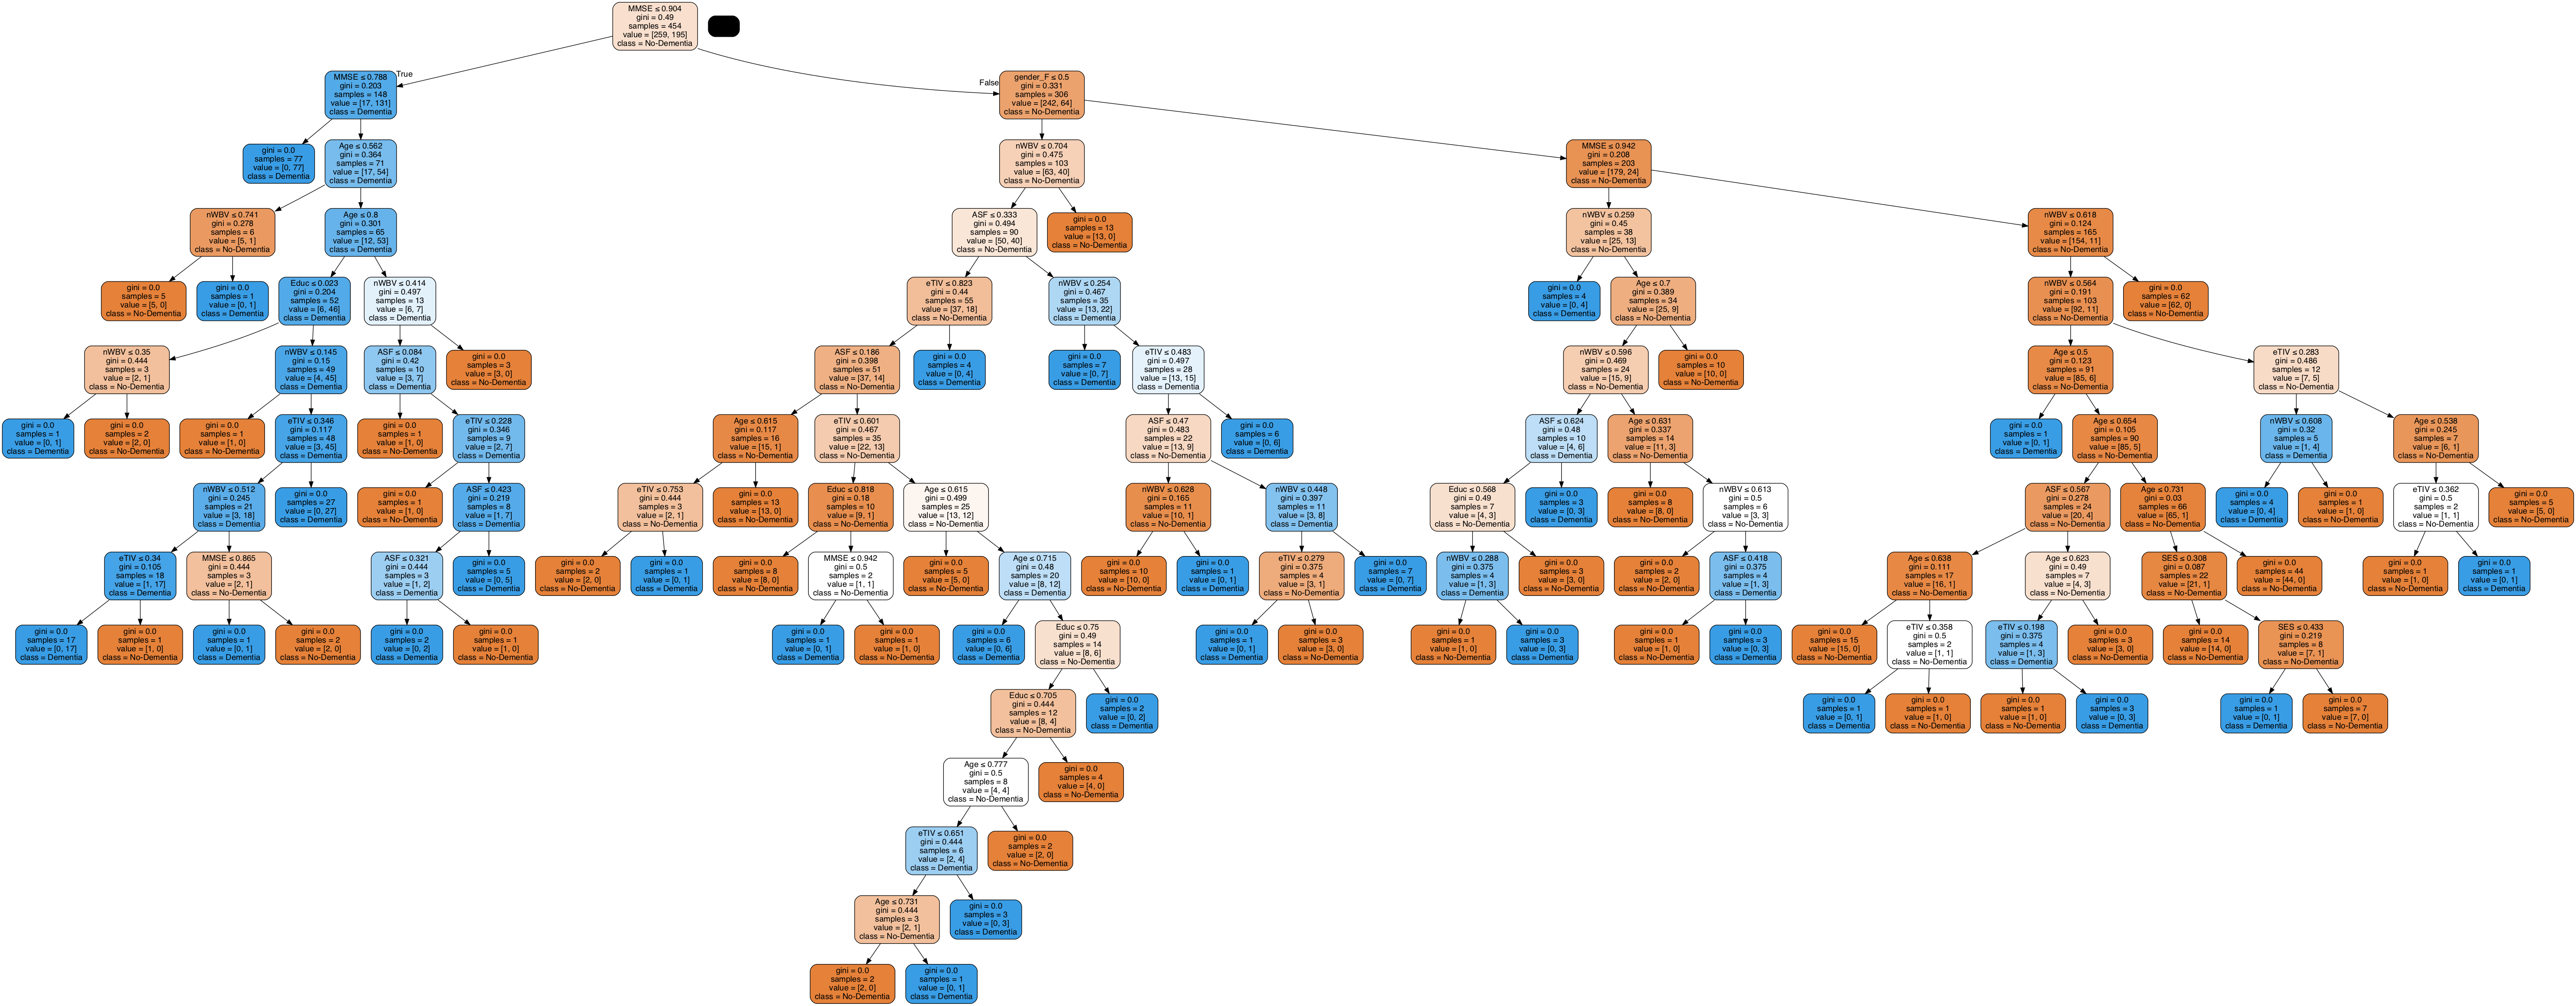

In [124]:
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["No-Dementia", "Dementia"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [126]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 0.8552631578947368
Balanced accuracy: 0.8554006968641115
Precision score 0.8333333333333334
Recall score 0.8536585365853658


With gini 85.5% of sample were correctly predicted.
Precision:83.3% of predicted Dementia  were correct using gini.
Recall : 85.3 % of No_Dementia were predicted

### Model 3: Entropy model - max depth 3

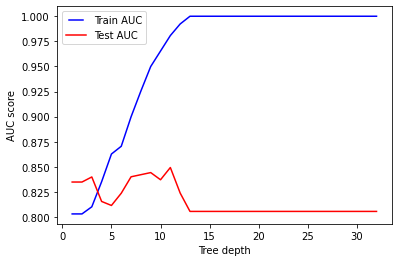

In [155]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth, random_state = 1234)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [160]:
entr_model2= tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test) 
y_pred = pd.Series(y_pred) 
entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

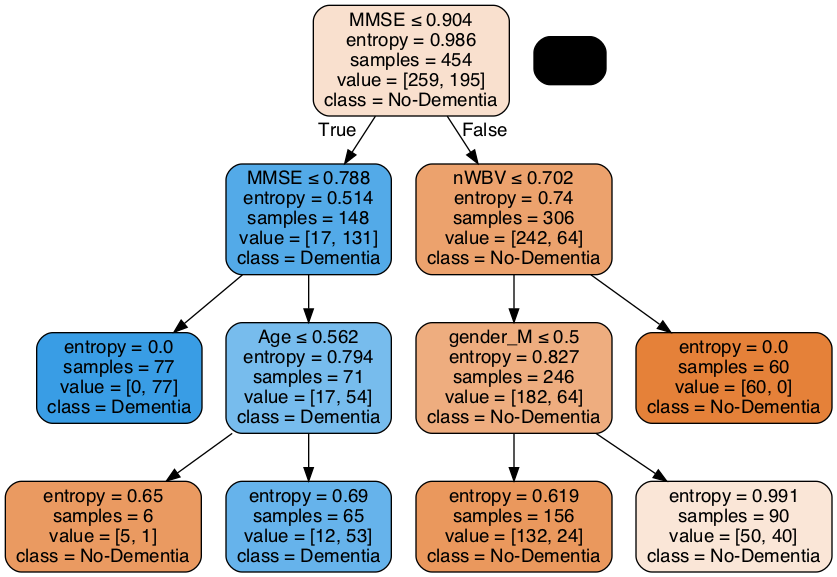

In [161]:
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["No-Dementia", "Dementia"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [162]:
print("Entropy model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Entropy model - max depth 3
Accuracy: 0.8486842105263158
Balanced accuracy: 0.8398954703832753
Precision score 0.9272727272727272
Recall score 0.9512195121951219


In [163]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.8398954703832753

84.9% of sample were correctly predicted. Precision:92.7% of predicted Dementia were correct. Recall : 95.1 % of No_Dementia were predicted

### Evaluating the decision tree model

Entropy model - max depth 3 is a good model, as it predicts higher percentage of no_Dementia which is important in medical diagnosis